### Cleaning

In [72]:
#Import usefull libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [73]:
#Import data
data = pd.read_csv(r'C:\Users\matui\IronLab\uber\uber-tlc-foil-response\uber-trip-data\uber-raw-data-apr14.csv')

In [74]:
#Overview
data.head(5)

Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512

In [75]:
#Printing data infos: data types, missimng values, shape
#The dataframe is composed of 4 columns and 564516 rows, no missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [76]:
#We have to change the Date/Time data type
data['Date/Time'] = pd.to_datetime(data['Date/Time'], format='%m/%d/%Y %H:%M:%S')

In [77]:
#Checking result
data.head(5)

Date/Time      Lat      Lon    Base
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512

In [78]:
#Checking result
data.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [79]:
#Extract hour from datetime
data['Hour'] = pd.to_datetime(data['Date/Time']).dt.hour

In [80]:
#Extract day
data['Day'] = data['Date/Time'].dt.dayofweek

In [81]:
#Making sure columns has been created has intended
data

Date/Time      Lat      Lon    Base  Hour  Day
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512     0    1
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512     0    1
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512     0    1
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512     0    1
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512     0    1
...                    ...      ...      ...     ...   ...  ...
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764    23    2
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764    23    2
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764    23    2
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764    23    2
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764    23    2

[564516 rows x 6 columns]

In [82]:
data.Day.value_counts()

2    108631
1     91185
4     90303
3     85067
5     77218
0     60861
6     51251
Name: Day, dtype: int64

In [83]:
data.Hour.value_counts()

17    45475
18    43003
16    42003
19    38923
21    36964
20    36244
15    35324
22    30645
14    27190
7     24924
8     22843
13    22603
23    20649
12    19425
11    18774
6     18498
9     17939
10    17865
0     11910
5      9476
1      7769
4      6095
3      5040
2      4935
Name: Hour, dtype: int64

In [84]:
from sklearn.preprocessing import LabelEncoder
tst = data.copy()
le = LabelEncoder()
data['Base'] = le.fit_transform(data.Base.values)

In [85]:
data.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                  int32
Hour                  int64
Day                   int64
dtype: object

In [86]:
#Checking values of Base column
#We can see there are 5 Bases
data.Base.value_counts()

3    227808
1    183263
2    108001
0     35536
4      9908
Name: Base, dtype: int64

In [87]:
#Making a copy of df for encoding
#data_enc = data

In [88]:
#Encoding df, should encode Base column
#data_enc = pd.get_dummies(data_enc)

In [89]:
#Cheking results
#data_enc

### EDA

<AxesSubplot:>

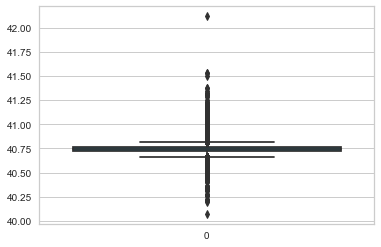

In [90]:
#Check repartition of the car, coordonates speaking
sns.boxplot(data=data.Lat)

<AxesSubplot:>

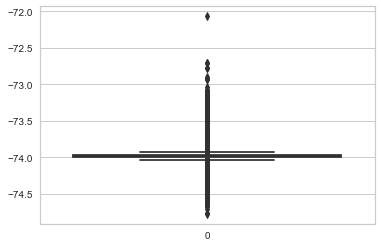

In [91]:
#Check repartition of the car, coordonates speaking
sns.boxplot(data=data.Lon)

In [92]:
data.to_csv(r'C:\Users\matui\Downloads\uber_cleaned.csv')

### Kmean clustering

In [93]:
data_sample = data.sample(int(data_enc2.shape[0]*0.01))
data_sample.shape

(5645, 6)

In [94]:
#Drop the datetime column as the dtypes bring trouble
data_sample = data_sample.drop(columns='Date/Time')

In [95]:
data_sample.dtypes

Lat     float64
Lon     float64
Base      int32
Hour      int64
Day       int64
dtype: object

In [96]:
#Scaling data
from sklearn.preprocessing import StandardScaler
x = data_sample[['Lat', 'Lon']]  #sample because it will allow to do faster code

scaler = StandardScaler()
print(scaler.fit(x))
print(scaler.mean_)
uber_scale = scaler.transform(x)
print(uber_scale)

StandardScaler()
[ 40.7408529  -73.97529605]
[[ 0.05236484 -0.2665061 ]
 [ 0.44373829 -0.25905344]
 [-0.17785484 -1.63593188]
 ...
 [ 0.7200019  -0.14726358]
 [ 1.02184548 -0.06714752]
 [ 2.74081908  0.83462401]]


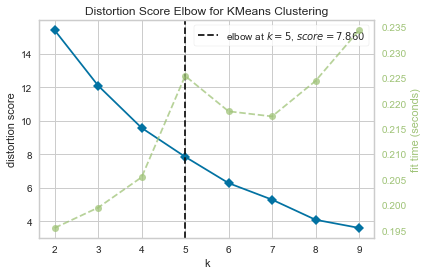

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [97]:
#Defining right amount of cluster using Elbow method
#5 clusters with kmeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10))
visualizer.fit(x)
visualizer.poof()

In [98]:
#Create model / predict
model = KMeans(5)
y_kmeans = model.fit_predict(x)

In [99]:
np.unique(y_kmeans, return_counts=True)

(array([0, 1, 2, 3, 4]), array([2796,  175,  202, 2467,    5], dtype=int64))

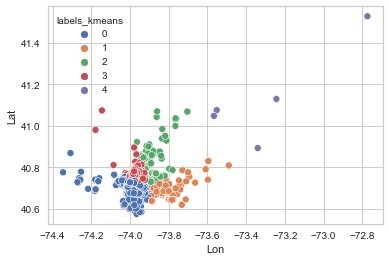

In [100]:
#Adding label to df
data_sample['labels_kmeans'] = model.labels_

#Plotting
sns.scatterplot(data=data_sample, x='Lon', y='Lat', hue='labels_kmeans', palette='deep')
plt.show()

### DBSCAN clustering

In [101]:
from sklearn.neighbors import NearestNeighbors

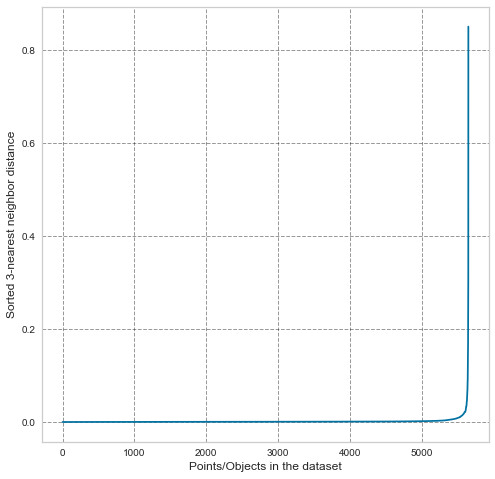

In [102]:
#Selecting hyperparameters for dbscan
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(x)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(x) 
                                       
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * x.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=x, k=k)

In [103]:
#DBSCAN clustering
#We can see n previous graph that eps is more or less 0.01
dbscan = DBSCAN(eps=0.01, min_samples=20, n_jobs=-1)
dbscan.fit(x)
y_dbscan = dbscan.fit_predict(x)

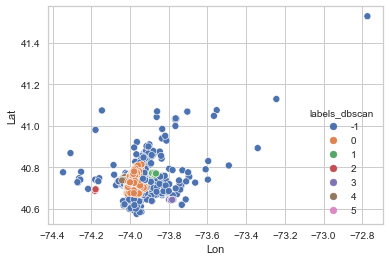

In [104]:
#Adding label to df
data_sample['labels_dbscan'] = dbscan.labels_

#Plotting
sns.scatterplot(data=data_sample, x='Lon', y='Lat', hue='labels_dbscan', palette='deep')
plt.show()

### Agglomerative clustering

In [105]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

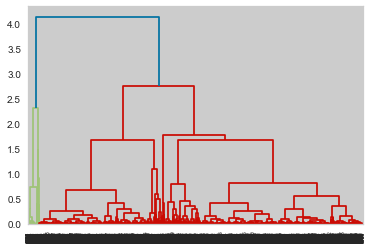

In [106]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

In [107]:
clustering = AgglomerativeClustering(n_clusters=4).fit(x)
y_agg = clustering.fit_predict(x)
data_sample['labels_agg'] = clustering.labels_

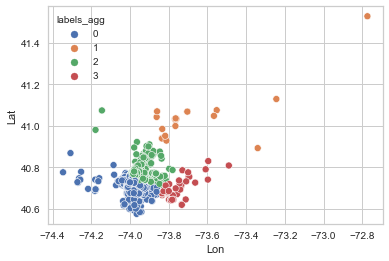

In [108]:
sns.scatterplot(data=data_sample, x='Lon', y='Lat', hue='labels_agg', palette='deep')
plt.show()

### Comparison

In [109]:
from sklearn import metrics
print('KMeans')
print('=============')
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_sample,data_sample['labels_kmeans'],  metric = 'sqeuclidean'))
print("calinski_harabasz: %0.3f" % metrics.calinski_harabasz_score(data_sample,data_sample['labels_kmeans'] ))

print('_____________')
print('DBSCAN')
print('=============')
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_sample,data_sample['labels_dbscan'],  metric = 'sqeuclidean'))
print("calinski_harabasz: %0.3f" % metrics.calinski_harabasz_score(data_sample,data_sample['labels_dbscan'] ))

print('_____________')
print('Agglomerative')
print('=============')
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_sample,data_sample['labels_agg'],  metric = 'sqeuclidean'))
print("calinski_harabasz: %0.3f" % metrics.calinski_harabasz_score(data_sample,data_sample['labels_agg'] ))

KMeans
Silhouette Coefficient: -0.167
calinski_harabasz: 108.074
_____________
DBSCAN
Silhouette Coefficient: -0.142
calinski_harabasz: 16.772
_____________
Agglomerative
Silhouette Coefficient: 0.058
calinski_harabasz: 120.920


### Map

In [110]:
#Library to plot map
import folium

In [112]:
data_sample

Lat      Lon  Base  Hour  Day  labels_kmeans  labels_dbscan  \
158455  40.7429 -73.9896     1     0    3              0              0   
440754  40.7582 -73.9892     3    22    1              3              0   
37118   40.7339 -74.0631     1    14    1              0             -1   
421654  40.7316 -73.9949     3    22    5              0              0   
178135  40.7793 -73.9511     1    10    5              3              0   
...         ...      ...   ...   ...  ...            ...            ...   
50784   40.7781 -73.9762     1    10    4              3              0   
496691  40.6228 -74.0284     3    12    3              0             -1   
49194   40.7690 -73.9832     1    23    3              3              0   
215491  40.7808 -73.9789     1    19    2              3              0   
505377  40.8480 -73.9305     3    12    4              2             -1   

        labels_agg  
158455           0  
440754           2  
37118            0  
421654           0  
178135           2  
...            ...  
50784            2  
496691           0  
49194            2  
215491           2  
505377           2  

[5645 rows x 8 columns]

In [116]:
def map(data, cluster_column, Day):
    m = folium.Map(location=[data.Lat.mean(), data.Lon.mean()], zoom_start=9, tiles='OpenStreet Map')
    for _, row in data.iterrows():
        if row[cluster_column] == -1 and row[Day]:
            cluster_colour = '#006400'
        elif row[cluster_column] == 0 and row[Day]:
            cluster_colour = '#FF5233'
            folium.CircleMarker(
                location= [row['Lat'], row['Lon']],
                radius=1,
                popup= row[cluster_column],
                color=cluster_colour,
                fill=True,
                fill_color=cluster_colour
            ).add_to(m)
        elif row[cluster_column] == 1 and row[Day]:
            cluster_colour = '#FF3349'
            folium.CircleMarker(
                location= [row['Lat'], row['Lon']],
                radius=1,
                popup= row[cluster_column],
                color=cluster_colour,
                fill=True,
                fill_color=cluster_colour
            ).add_to(m)
        elif row[cluster_column] == 2 and row[Day]:
            cluster_colour = '#7AFF33'
            folium.CircleMarker(
                location= [row['Lat'], row['Lon']],
                radius=1,
                popup= row[cluster_column],
                color=cluster_colour,
                fill=True,
                fill_color=cluster_colour
            ).add_to(m)
        elif row[cluster_column] == 3 and row[Day]:
            cluster_colour = '#33FFF9'
            folium.CircleMarker(
                location= [row['Lat'], row['Lon']],
                radius=1,
                popup= row[cluster_column],
                color=cluster_colour,
                fill=True,
                fill_color=cluster_colour
            ).add_to(m)
        elif row[cluster_column] == 4 and row[Day]:
            cluster_colour = '#6133FF'
            folium.CircleMarker(
                location= [row['Lat'], row['Lon']],
                radius=1,
                popup= row[cluster_column],
                color=cluster_colour,
                fill=True,
                fill_color=cluster_colour
            ).add_to(m)
        elif row[cluster_column] == 5 and row[Day]:
            cluster_colour = '#FF33FC'
            folium.CircleMarker(
                location= [row['Lat'], row['Lon']],
                radius=1,
                popup= row[cluster_column],
                color=cluster_colour,
                fill=True,
                fill_color=cluster_colour
            ).add_to(m)
    return m 

In [117]:
#Day from 0 to 6
map(data_sample, 'labels_agg', 3)